In [1]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [2]:
music_data = data.MusicDataProvider()

Iter 00, logit: -7.202692
Iter 140, logit: -6.087748
[0.09993736 0.10313239 0.11092363 0.09913847 0.09478489 0.11123388
 0.06140534 0.12127029 0.091497   0.10667674]
Label accuracy is 0.7757142857142857
--------------------------------------------------
Data has 125 features
1.0
Iter 00, logit: -7.120616
Iter 140, logit: -4.773481
Iter 280, logit: -4.607327
Iter 420, logit: -4.537127
Iter 560, logit: -4.487944
(700, 125)
Classifier train accuracy is 0.7528571428571429
(300, 125)
Classifier test accuracy is 0.67
Label accuracy is 0.8142857142857143
--------------------------------------------------
Data has 125 features
1.0
True labels distribution [0.09571429 0.10285714 0.10571429 0.10285714 0.09       0.10142857
 0.10714286 0.09142857 0.1        0.10285714]
Iter 00, logit: -7.113378
Average Raykar weight is 0.3719619527737691
Iter 140, logit: -4.775823
Average Raykar weight is 0.9999997154518591
Iter 280, logit: -4.610327
Average Raykar weight is 0.9999999105933017
Iter 420, logit: -4

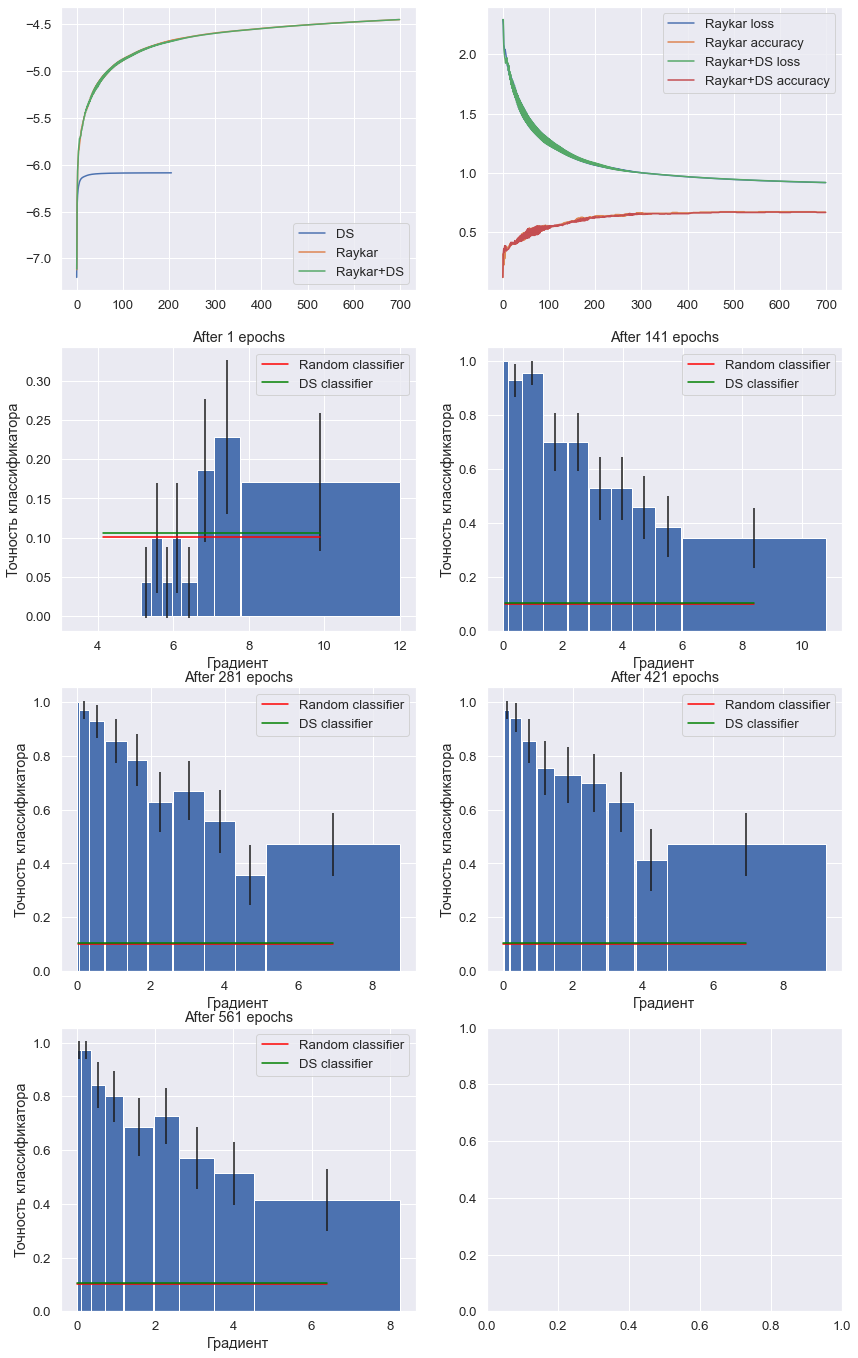

In [16]:
reload_all()
music_methods, music_points, advantages_matrix = bm.compare_methods(music_data, max_iter=700, lr=0.003)

Number of data points: 700
[0.09571429 0.10285714 0.10571429 0.10285714 0.09       0.10142857
 0.10714286 0.09142857 0.1        0.10285714]
0.10030204081632653
[1.     0.9375 0.8875 0.9125 0.8375 0.75   0.575  0.5375 0.6   ]
[ 0.31617  0.50886  0.67773  0.6632   0.84199  0.95155  1.05799  1.4563
 11.38474]
[0.02149 0.02392 0.02995 0.03004 0.03555]


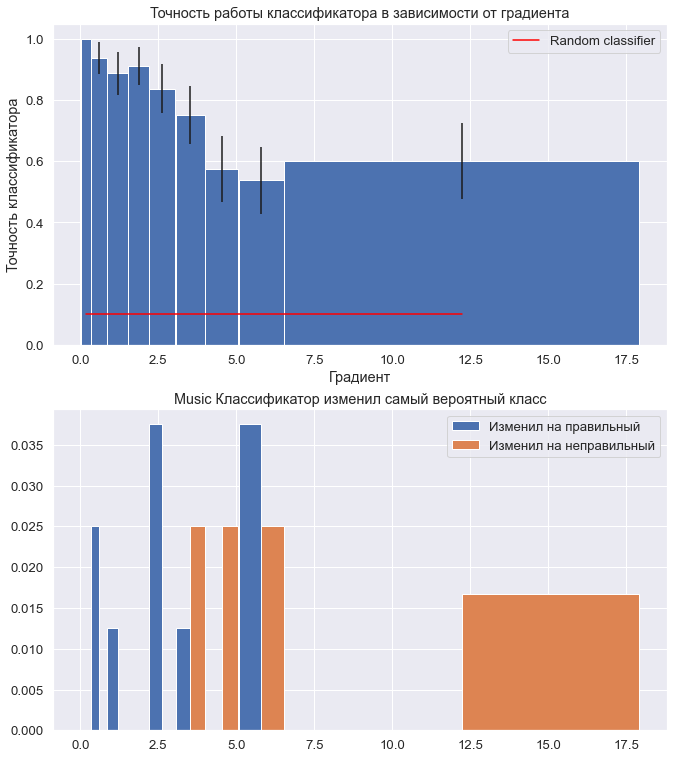

In [7]:
reload_all()
n = 80

buckets, confidences, max_grad, rnd_accuracy = bm.build_grad_hist(music_data, music_methods, music_points, 'Music', n);
confidence_music = bm.get_confidence(buckets, confidences, rnd_accuracy)

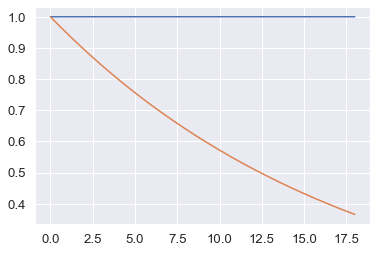

In [8]:
xs = np.linspace(0, 18, 1500)
ys = list(map(lambda x: confidence_music(x), xs))
plt.plot(xs, ys)
lambda2 = lambda x: np.exp(-x / max_grad)
plt.plot(xs, list(map(lambda2, xs)))

Iter 00, logit: -7.202692
Iter 40, logit: -6.098567
Iter 80, logit: -6.090356
Iter 120, logit: -6.088232
Iter 160, logit: -6.087427
[0.09993472 0.10313253 0.11092602 0.0991359  0.0947824  0.11122991
 0.06140385 0.12126823 0.09149714 0.1066893 ]
Label accuracy is 0.7757142857142857
--------------------------------------------------
Data has 125 features
1.0
Iter 00, logit: -7.221320
Iter 40, logit: -5.417342
Iter 80, logit: -5.008441
Iter 120, logit: -4.779820
Iter 160, logit: -4.636587
(700, 125)
Classifier train accuracy is 0.7871428571428571
(300, 125)
Classifier test accuracy is 0.6066666666666667
Label accuracy is 0.8042857142857143
--------------------------------------------------
Data has 125 features
1.0
Iter 00, logit: -7.210807
Average Raykar weight is 0.5824780849057686
Iter 40, logit: -5.588144
Average Raykar weight is 0.6586770792384149
Iter 80, logit: -5.173089
Average Raykar weight is 0.7385392960900657
Iter 120, logit: -4.919299
Average Raykar weight is 0.79312032446336

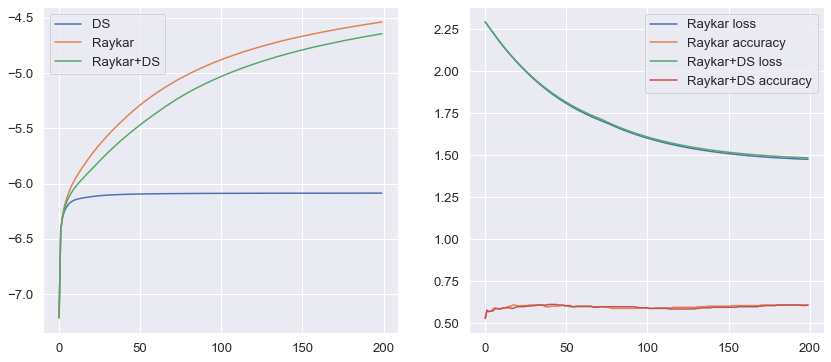

In [30]:
reload_all()
music_methods, music_points, advantages_matrix = bm.compare_methods(music_data, max_iter=200, lr=300, 
                                                                    confidence_estimator=lambda2)

In [16]:
music_points[music_points.task.isin(advantages_matrix[2][0])]

,task,mu_ds,conf_mx_ds,mu_r,conf_mx_r,classifier_r,grad_r,mu_rds,conf_mx_rds,classifier_rds,grad_rds,likelihood_rds,index
47,blues.00069.mp3,"[0.324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.676, 0.0, 0...","[-4.183, -inf, -59.605, -inf, -50.438, -inf, -...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.22, -inf, -264.599, -inf, -239.765, -inf, ...","[0.425, 0.084, 0.063, 0.036, 0.087, 0.079, 0.0...","[7.83011, 7.81842, 7.80556, 7.79248, 7.77956, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.252, -inf, -243.769, -inf, -213.194, -inf,...","[0.407, 0.086, 0.065, 0.039, 0.089, 0.081, 0.0...",3.40022,"[1.0, 0.0]",47
168,country.00035.mp3,"[0.214, 0.0, 0.023, 0.11, 0.039, 0.029, 0.0, 0...","[-2.756, -52.466, -5.089, -3.418, -4.398, -4.8...","[0.08, 0.0, 0.37, 0.154, 0.0, 0.0, 0.0, 0.396,...","[-3.108, -170.468, -4.055, -3.387, -64.522, -1...","[0.046, 0.048, 0.545, 0.116, 0.029, 0.023, 0.0...","[7.99644, 7.97207, 7.94454, 7.91495, 7.88379, ...","[0.09, 0.0, 0.436, 0.142, 0.0, 0.0, 0.0, 0.332...","[-3.078, -144.936, -3.854, -3.391, -51.266, -1...","[0.052, 0.048, 0.549, 0.112, 0.029, 0.023, 0.0...",2.01499,"[1.0, 0.0]",168
180,country.00056.mp3,"[0.0, 0.0, 0.14, 0.0, 0.0, 0.0, 0.0, 0.86, 0.0...","[-inf, -603.816, -3.466, -inf, -inf, -inf, -64...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-inf, -inf, -2.435, -inf, -inf, -inf, -inf, -...","[0.229, 0.009, 0.631, 0.027, 0.003, 0.031, 0.0...","[7.9678, 7.92578, 7.88095, 7.83372, 7.7847, 7....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-inf, -inf, -2.228, -inf, -inf, -inf, -inf, -...","[0.221, 0.009, 0.64, 0.026, 0.003, 0.031, 0.00...",1.28254,"[1.0, 0.0]",180
216,disco.00004.mp3,"[0.264, 0.0, 0.014, 0.181, 0.043, 0.052, 0.0, ...","[-0.436, -49.663, -3.466, -0.804, -2.19, -2.17...","[0.066, 0.0, 0.005, 0.653, 0.0, 0.0, 0.0, 0.27...","[-0.744, -167.665, -2.435, -0.589, -62.304, -1...","[0.057, 0.034, 0.025, 0.481, 0.02, 0.045, 0.01...","[8.16885, 8.15429, 8.13334, 8.10794, 8.08107, ...","[0.075, 0.0, 0.007, 0.648, 0.0, 0.0, 0.0, 0.27...","[-0.756, -142.132, -2.228, -0.6, -49.049, -111...","[0.064, 0.035, 0.026, 0.472, 0.021, 0.046, 0.0...",2.81320,"[1.0, 0.0]",216
225,disco.00019.mp3,"[0.384, 0.0, 0.015, 0.148, 0.055, 0.032, 0.0, ...","[-2.231, -52.047, -5.571, -3.178, -4.127, -4.8...","[0.017, 0.0, 0.008, 0.86, 0.0, 0.0, 0.0, 0.115...","[-2.592, -170.063, -4.317, -2.54, -64.299, -14...","[0.015, 0.008, 0.04, 0.716, 0.005, 0.006, 0.00...","[9.01725, 8.97894, 8.9413, 8.90371, 8.85838, 8...","[0.016, 0.0, 0.011, 0.844, 0.0, 0.0, 0.0, 0.12...","[-2.569, -144.53, -4.107, -2.563, -51.043, -11...","[0.014, 0.008, 0.042, 0.695, 0.005, 0.006, 0.0...",1.04186,"[1.0, 0.0]",225
229,disco.00024.mp3,"[0.533, 0.0, 0.006, 0.2, 0.034, 0.0, 0.0, 0.22...","[-2.079, -52.072, -6.723, -3.05, -4.772, -728....","[0.016, 0.0, 0.002, 0.965, 0.0, 0.0, 0.0, 0.01...","[-2.415, -169.968, -5.794, -2.636, -64.869, -i...","[0.011, 0.038, 0.043, 0.772, 0.053, 0.026, 0.0...","[8.14619, 8.1169, 8.08496, 8.05138, 8.01647, 7...","[0.02, 0.0, 0.003, 0.959, 0.0, 0.0, 0.0, 0.017...","[-2.363, -144.435, -5.591, -2.666, -51.614, -i...","[0.012, 0.04, 0.046, 0.758, 0.055, 0.027, 0.01...",0.59171,"[1.0, 0.0]",229
232,disco.00030.mp3,"[0.105, 0.0, 0.01, 0.124, 0.059, 0.033, 0.0, 0...","[-3.579, -51.803, -6.051, -3.402, -4.11, -4.85...","[0.018, 0.0, 0.012, 0.694, 0.0, 0.0, 0.0, 0.27...","[-3.32, -169.775, -5.064, -3.07, -64.16, -142....","[0.019, 0.025, 0.068, 0.559, 0.072, 0.015, 0.0...","[10.40232, 10.3754, 10.34277, 10.3069, 10.2693...","[0.02, 0.0, 0.015, 0.675, 0.0, 0.0, 0.0, 0.29,...","[-3.373, -144.243, -4.869, -3.075, -50.904, -1...","[0.022, 0.026, 0.071, 0.541, 0.075, 0.015, 0.0...",2.71172,"[1.0, 0.0]",232
235,disco.00034.mp3,"[0.706, 0.0, 0.01, 0.159, 0.037, 0.078, 0.0, 0...","[-4.329, -54.943, -8.668, -5.815, -7.235, -6.6...","[0.289, 0.0, 0.006, 0.705, 0.0, 0.0, 0.0, 0.0,...","[-4.891, -172.953, -7.735, -5.172, -67.375, -1...","[0.083, 0.053, 0.03, 0.27, 0.015, 0.008, 0.11,...","[8.3

Annotation(annotator='A1G05O3HM7DNVZ', task='blues.00084.mp3', value='pop')
Annotation(annotator='AL12RG9EJZ60', task='blues.00084.mp3', value='country')
Annotation(annotator='AK0F484W5TBJ4', task='blues.00084.mp3', value='classical')


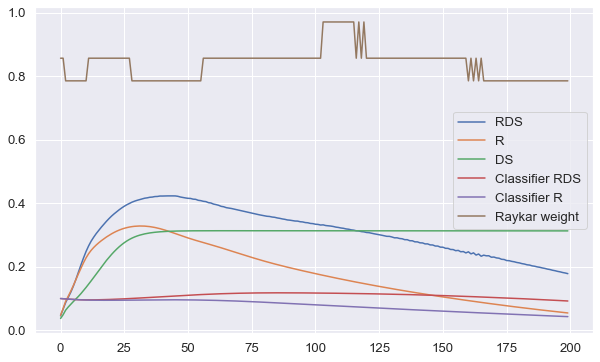

In [7]:
bm.plots_for_point(music_points, music_data, music_methods, 58)

In [8]:
reload_all()
bm.boosting_classifiers_distr(music_points[music_points.task.isin(advantages_matrix[1][0])],
                         music_points[music_points.task.isin(advantages_matrix[0][1])])

TypeError: boosting_classifiers_distr() missing 1 required positional argument: 'name'

In [ ]:
music_points.classifier_rb.loc[507]

In [ ]:
reload_all()
bm.plot_all_gradients(music_points[music_points.task.isin(advantages_matrix[1][0])],
                         music_points[music_points.task.isin(advantages_matrix[0][1])])

In [ ]:
plt.plot(music_methods[1].accuracies)
plt.plot(music_methods[2].accuracies)

In [ ]:
max(music_methods[1].accuracies), max(music_methods[2].accuracies)

1.0


(0.5933333333333334, 0.6)

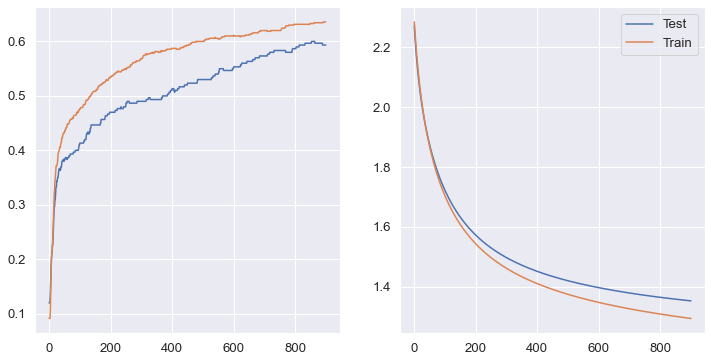

In [33]:
reload_all()
bm.run_mv_classifier(music_data, iters=900, n_classes=10, lr=0.0007, hard=False)

1.0


0.050598182598603436
0.10575653513991498
0.15134014863516948
0.20043649946597134
0.24372563760139562
0.28598808817043325
0.3263442039958256
0.36425915937903164
0.40165879102683877
0.4365901872072989
0.47158617676221315
0.5040624189934305
0.5369815636699774
0.5666291075382623
0.5972463320512951
0.6248451897300852
0.6538335654909897
0.6800464439175244
0.7073810229998836
0.7323492873332279
0.7581188945852875
0.7821029804292962
0.8064147371828871
0.8295452057727842
0.8525020992850968
0.874856498608058
0.8965972689544539
0.9182058843905784
0.9388751341219891
0.9597504453056378
0.9794825625421313
0.9996406157918101
1.0185469026715697
1.0380128897807075
1.0561812067216796
1.0749871547327248
1.0924871066220703
1.1106678784833093
1.1275560997288185
1.1451466215839015
1.161470604590505
1.1785044338912922
1.1943049922721574
1.210813716597897
1.2261265622280844
1.2421396248543763
1.256996416915484
1.272541140572812
1.2869702190115164
1.3020719151791775
1.3160988382210317
1.33078094870486
1.3444289

3.291424036532206
3.293781586299484
3.2961343530365146
3.2984823561272107
3.300825614834816
3.303164148302936
3.305497975556561
3.307827115503078
3.310151586933267
3.312471408522296
3.3147865988306937
3.3170971763053223
3.319403159280333
3.3217045659781133
3.3240014145102257
3.3262937228783347
3.3285815089751236
3.3308647905852036
3.333143585386012
3.3354179109487
3.3376877847390145
3.3399532241181658
3.3422142463436906
3.3444708685703026
3.346723107850738
3.3489709811365884
3.3512145052791267
3.353453697030125
3.355688573042664
3.3579191498719316
3.360145443976017
3.3623674717166936
3.3645852493601964
3.366798793077989
3.3690081189475234
3.3712132429529955
3.373414180986086
3.3756109488467008
3.377803562243699
3.379992036795616
3.3821763880313793
3.3843566313910163
3.386532782226354
3.388704855801714
3.3908728672946
3.3930368317963757
3.39519676431294
3.397352679765393
3.3995045929906964
3.401652518742326
3.4037964716909186
3.405936466424914
3.408072517451188
3.410204639195681
3.41233

(0.7333333333333333, 0.7333333333333333)

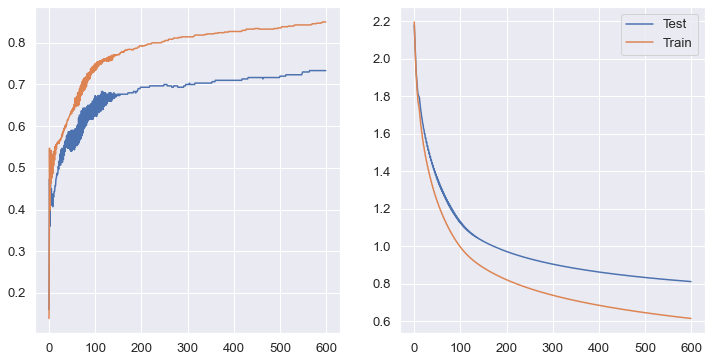

In [25]:
reload_all()
bm.run_mv_classifier(music_data, iters=600, n_classes=10, lr=0.0025, hard=True)